# Data preparation project for water quality

# Water potability
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level.

we will start discussing how we could explore our data systematically using data preparation techniques. We will be using a data set that contains water potability information from (https://www.kaggle.com/datasets/adityakadiwal/water-potability). 

## Feature Description
**1. pH value:**
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

**2. Hardness:**
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**3. Solids (Total dissolved solids - TDS):**
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

**4. Chloramines:**
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

**5. Sulfate:**
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

**6. Conductivity:**
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

**7. Organic_carbon:**
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

**8. Trihalomethanes:**
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

**9. Turbidity:**
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

**10. Potability:**
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## <strong>We have referred to some codes of the material in class<strong>

# Libraries

In [1]:
# Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Data Pre-processing Libraries
#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer

#Modelling Libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier

#feature selection libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector

# Part 1-Dataset presentation

In [2]:
# importing the dataset
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
# generate atrribute's descriptors
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


There are ten attributes in total. The first 9 are the water quality measurements, and the last one is to determine whether the water is safe to drink.

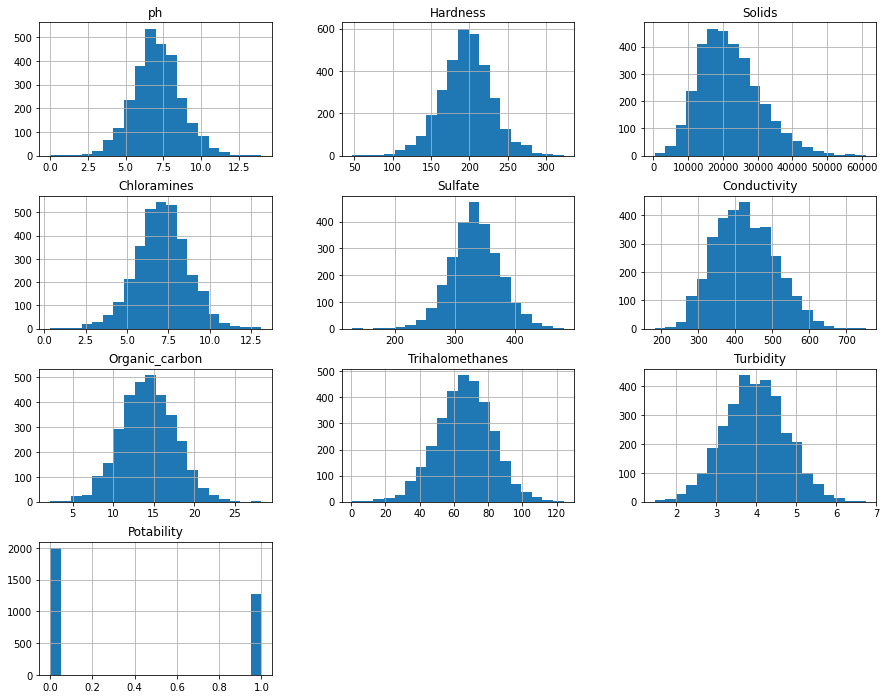

In [4]:
# Observe the feature distribution by creating a histogram
df.hist(figsize=(15,12),bins = 20);

Besides potability, other attritubutes follow normal distribution. Potability only has value 0 or 1 indicating whether the water is safe to drink or not.

In [5]:
# missing data check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Just by looking at the the result from the info() method, we can clearly see that there are several values from the column "value" missing. 

In [6]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**We have 3 features with the mssing values.**                                                 
**<font size =3>1. ph</font>** 
**<font size =3>2. Sulfate</font>**
**<font size =3>3. Trihalomethanes</font>** 

In [7]:
# outlier check
def lowerupper(col):
    q1=np.quantile(col,.25)
    q3=np.quantile(col,.75)
    inter=q3-q1
    lowerbound=q1-(inter*1.5)
    upperbound=q3+(inter*1.5)
    outlier=[]
    for x in col:
        if((x>upperbound)or(x<lowerbound)):
            outlier.append(x)
    return outlier
col=df.columns
for i in col:
    outlier=lowerupper(df[i].values)
    print(len(outlier),"outliers are present in",i)

0 outliers are present in ph
83 outliers are present in Hardness
47 outliers are present in Solids
61 outliers are present in Chloramines
0 outliers are present in Sulfate
11 outliers are present in Conductivity
25 outliers are present in Organic_carbon
0 outliers are present in Trihalomethanes
19 outliers are present in Turbidity
0 outliers are present in Potability


By a caculation based on a five-number summary (a minimum, first quartile (Q1), median, third quartile (Q3), and maximum), we can tell outliers in the dataset.

# Part 2-Data scaling
In this part, different data scaling techniques will be implemented to the dataset.

First,drop the rows with missing data so it will not interfere data scaling.

In [8]:
# Drop rows that are with NaN since some scaling methods do not accept them as input
ndf = df.dropna()
ndf.head(15)
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


Next step, we will implement different techniques to the dataset including MinMax, Quantile and Robust. The first MinMax scaler transformed data to 0-1, normalizing the dataset. The second quantile transformer transforms the features into a uniform distribution spreading out the most frequent values. The last one is robust aiming to remove the effect of outliers.

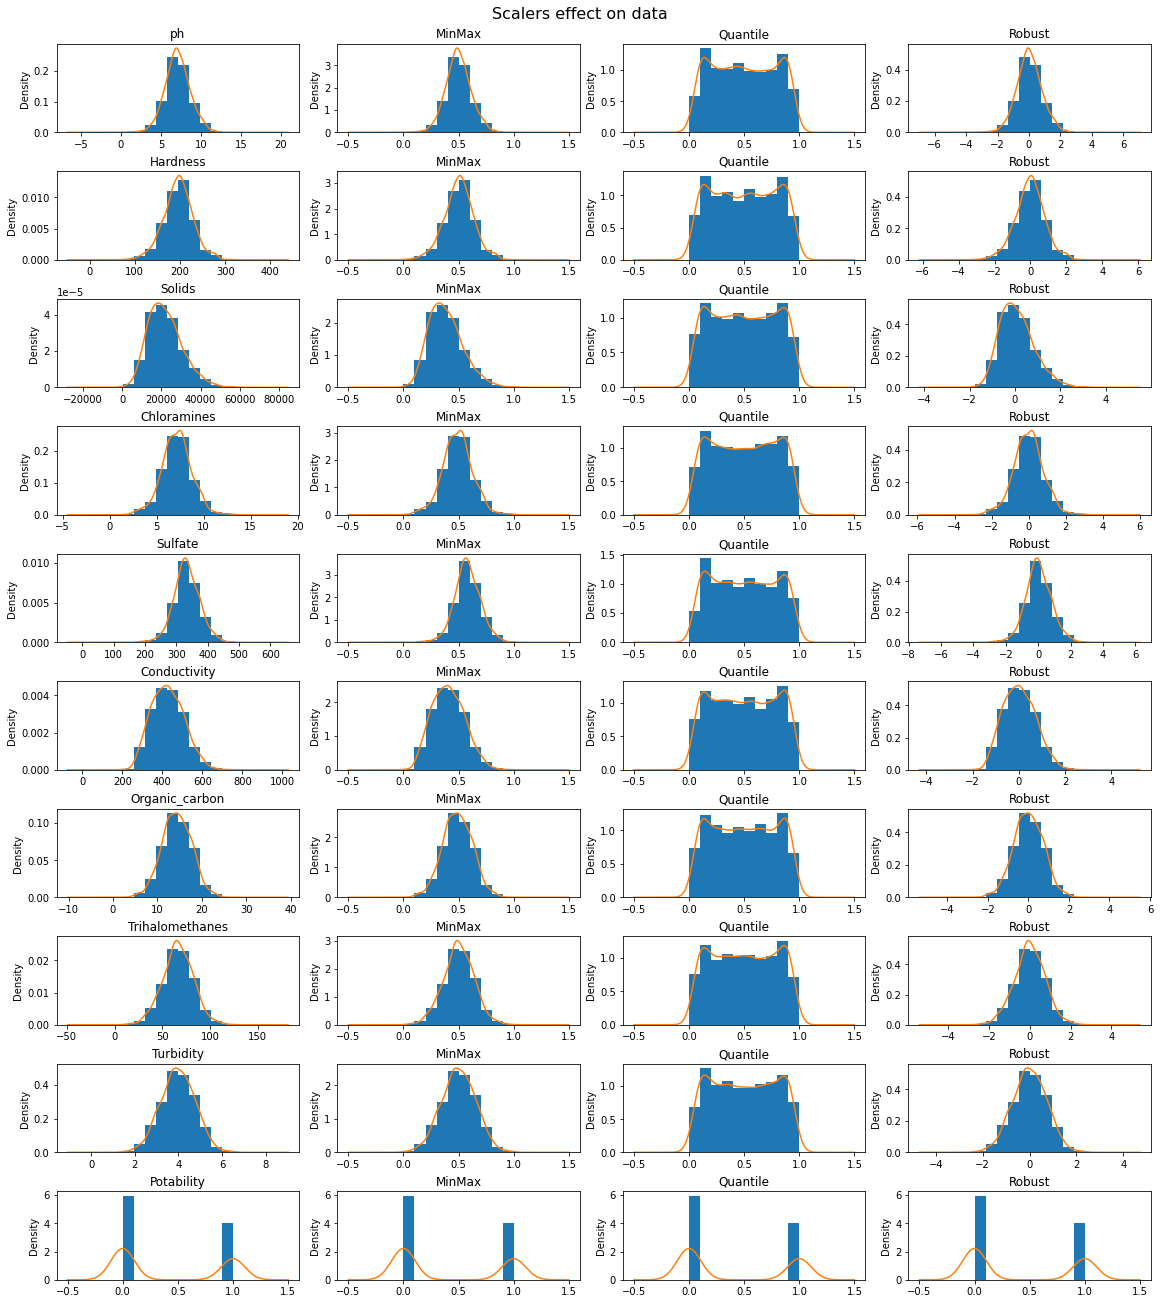

In [34]:
# 6 data scaling techniques
def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        ndf[c].hist(ax=axs[i], density=True) # normalizes the density
        ndf[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df) # transform the data
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1
            

val_cols_names = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
scaler_names = ['MinMax', 'Quantile', 'Robust']
arr_scalers = [MinMaxScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='uniform'), RobustScaler()]
plot_histograms_density_for_scalers(ndf, val_cols_names, 'Scalers effect on data', arr_scalers, scaler_names)

The plots reach the designed effects of the scalers. The quantile changes the distribution. The last attribute is potability indicating whether water is safe or not, so scalers don’t affect it.

# Part 3-Handling missing data and outliers

## Replacing method to deal with missing data

Now let's explore how each missing column is distributed in a way we can assess the best centrality measures to be applied to the column. As can be observed in the chart below, it would be better to use a mean whenever we want to replace some values with a central value.

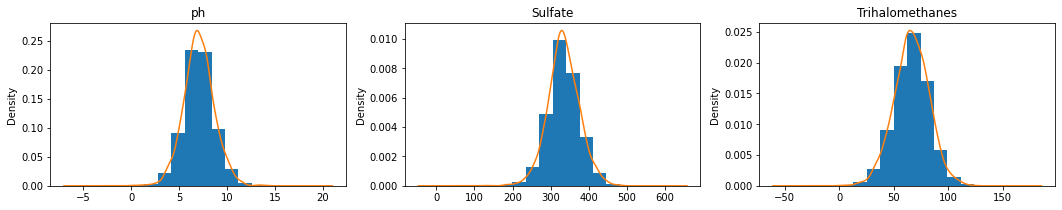

In [11]:
#observe each missing column distribution
val_cols_names = ['ph','Sulfate','Trihalomethanes']
def plot_histograms_density(df, columns):
    fig, axs = plt.subplots(1,3,figsize=(18,3))
    i = 0
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        i+=1
plot_histograms_density(df, val_cols_names)


Since the missing values are on both classess (Potability 1 & 0), we can replace it with population mean. so, we will replace the Nan values bases on sample mean from both classes.

In [12]:
#Replace null values based on the group/sample mean
df_c=df.copy()# we can just use the command copy to creat a new DataFrame
df_c['ph']=df_c['ph'].fillna(df_c.groupby(['Potability'])['ph'].transform('mean'))
df_c['Sulfate']=df_c['Sulfate'].fillna(df_c.groupby(['Potability'])['Sulfate'].transform('mean'))
df_c['Trihalomethanes']=df_c['Trihalomethanes'].fillna(df_c.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [13]:
df_c.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

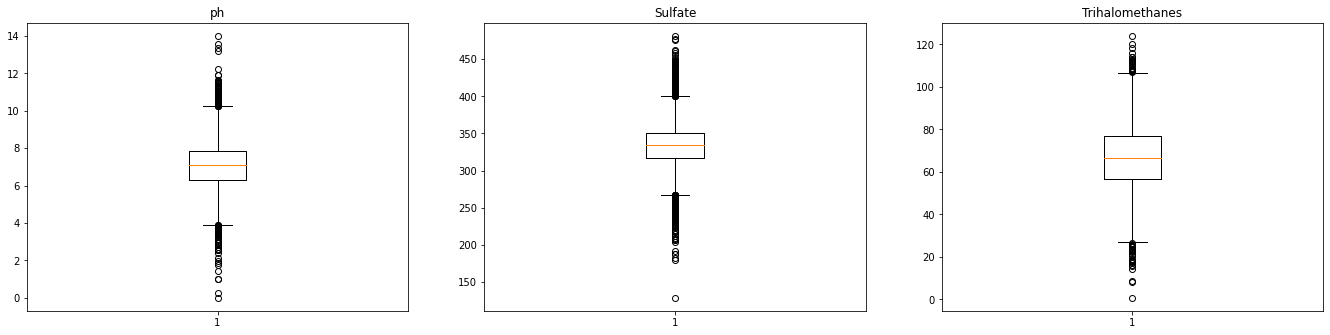

In [14]:
# boxplot for 'ph', 'Sulfate' ,'Trihalomethanes'
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("ph")
plt.boxplot(df_c["ph"])

plt.subplot(1,3,2)
plt.title("Sulfate")
plt.boxplot(df_c["Sulfate"])

plt.subplot(1,3,3)
plt.title("Trihalomethanes")
plt.boxplot(df_c["Trihalomethanes"])

plt.show()

In [15]:
# check each columns outlier again after hadling missing data
col=df.columns
for i in col:
    outlier=lowerupper(df_c[i].values)
    print(len(outlier),"outliers are present in",i)

142 outliers are present in ph
83 outliers are present in Hardness
47 outliers are present in Solids
61 outliers are present in Chloramines
264 outliers are present in Sulfate
11 outliers are present in Conductivity
25 outliers are present in Organic_carbon
54 outliers are present in Trihalomethanes
19 outliers are present in Turbidity
0 outliers are present in Potability


From plot above, we can find a potential problem after dealing with mising data. This potential problem is 'ph','Sulfate',Trihalomethanes columns have outliers that these cloumns did not have before. 

**Replacing outliers**

In [16]:
# use the InterQuartile Range (IQR) to find and replace these values.
outlier_names = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity',]
def replace_outliers_IQR(df, columns):
    for c in columns:
        q1=df[c].quantile(0.25)
        q3=df[c].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        high_lim = q3 + 1.5*iqr
        print(f"High ({c}):", high_lim)
        print(f"Low ({c}):", low_lim)
        df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c]))
        
replace_outliers_IQR(df_c, outlier_names)


High (ph): 10.258615434291345
Low (ph): 3.889106956840228
High (Hardness): 276.3928337208903
Low (Hardness): 117.12516037150485
High (Solids): 44831.86987314956
Low (Solids): -1832.4174487462951
High (Chloramines): 11.09608644703562
Low (Chloramines): 3.1462213405647073
High (Sulfate): 400.3224341668413
Low (Sulfate): 267.15795986167404
High (Conductivity): 655.8791400416264
Low (Conductivity): 191.64757856456453
High (Organic_carbon): 23.295426859188986
Low (Organic_carbon): 5.328026018267515
High (Trihalomethanes): 106.69503986064285
Low (Trihalomethanes): 26.619225158022296
High (Turbidity): 6.091233163793407
Low (Turbidity): 1.8487974931046152


In [17]:
# check outlier again after dealing with outliers.
col=df.columns
for i in col:
    outlier=lowerupper(df_c[i].values)
    print(len(outlier),"outliers are present in",i)

0 outliers are present in ph
0 outliers are present in Hardness
0 outliers are present in Solids
0 outliers are present in Chloramines
0 outliers are present in Sulfate
0 outliers are present in Conductivity
0 outliers are present in Organic_carbon
0 outliers are present in Trihalomethanes
0 outliers are present in Turbidity
0 outliers are present in Potability


## Model + Data Scaling to handle missing data
Firstly, We will use linear regression, knn regression + MinMax, Z-score, MaxAbs, Robust, Quantile to forcast the missing data(**1. ph 2. Sulfate 3. Trihalomethanes**), then we will choose the best combination to fill missing data.

In [18]:
# preparing model and scaling techniques.

# let's remove all the rows we need to fix and store to use later
fix_df = df_c[df.isna().any(axis=1)]
# we will use the clean DF to create models
ndf = df.dropna()



scaler_linear_names = ['Linear-MinMax', 'Linear-Z-score', 'Linear-MaxAbs', 'Linear-Robust', 'Linear-Quantile']
scaler_knn_names = ['KNN-MinMax', 'KNN-Z-score', 'KNN-MaxAbs', 'KNN-Robust', 'KNN-Quantile']

# initialize scaler
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]

results = {}

# here we create a linear regression model
linear_model = LinearRegression()
# here we create a knn model
knn_model = KNeighborsRegressor()

# use a Repeated cross-validation with 5 folds and 10 repetitions 
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)

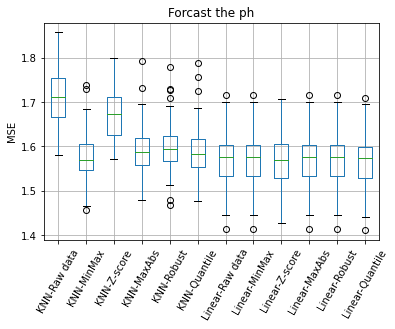

In [19]:
# Forcast ph

#knn model using raw data
X = ndf.drop(['ph'], axis=1).to_numpy() # X is all the other variables
y = ndf['ph'].to_numpy() # y is ph that we want to forecast
scores = cross_val_score(knn_model, X, y,scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
results['KNN-Raw data'] = [abs(elem) for elem in scores]

#knn model using transform data
for i in range (len(arr_scalers)):
    # X is all the other variables
    X = ndf.drop(['ph'], axis=1).to_numpy()
    # Let's tranform X 
    X_t = arr_scalers[i].fit_transform(X)
    # y is ph that we want to forecast
    y = ndf['ph'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    scores = cross_val_score(knn_model, X_t, y, scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
    results[scaler_knn_names[i]] = [abs(elem) for elem in scores]

#linear model using raw data
X = ndf.drop(['ph'], axis=1).to_numpy() # X is all the other variables
y = ndf['ph'].to_numpy() # y is ph that we want to forecast
scores = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
results['Linear-Raw data'] = [abs(elem) for elem in scores]

#linear model using transform data
for i in range (len(arr_scalers)):
    # X is all the other variables
    X = ndf.drop(['ph'], axis=1).to_numpy()
    # Let's tranform X 
    X_t = arr_scalers[i].fit_transform(X)
    # y is ph that we want to forecast
    y = ndf['ph'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    scores = cross_val_score(linear_model, X_t, y,scoring='neg_root_mean_squared_error', cv=cv,n_jobs=-1)
    results[scaler_linear_names[i]] = [abs(elem) for elem in scores]

# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot(rot=60) 
boxplot.set_ylabel('MSE')
boxplot.set_title('Forcast the ph')
plt.show()

**<font size=3>Forcast ph missing data: The best combination is Linear regression + Z-score scaler since it decreases the error from 1.7 to 1.4<font>**
   


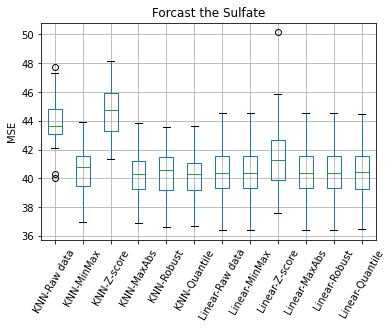

In [20]:
# Forcast Sulfate

#knn model using raw data
X = ndf.drop(['Sulfate'], axis=1).to_numpy() # X is all the other variables
y = ndf['Sulfate'].to_numpy() # y is ph that we want to forecast
scores = cross_val_score(knn_model, X, y,scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
results['KNN-Raw data'] = [abs(elem) for elem in scores]

#knn model using transform data
for i in range (len(arr_scalers)):
    # X is all the other variables
    X = ndf.drop(['Sulfate'], axis=1).to_numpy()
    # Let's tranform X 
    X_t = arr_scalers[i].fit_transform(X)
    # y is ph that we want to forecast
    y = ndf['Sulfate'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    scores = cross_val_score(knn_model, X_t, y, scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
    results[scaler_knn_names[i]] = [abs(elem) for elem in scores]

#linear model using raw data
X = ndf.drop(['Sulfate'], axis=1).to_numpy() # X is all the other variables
y = ndf['Sulfate'].to_numpy() # y is ph that we want to forecast
scores = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
results['Linear-Raw data'] = [abs(elem) for elem in scores]

#linear model using transform data
for i in range (len(arr_scalers)):
    # X is all the other variables
    X = ndf.drop(['Sulfate'], axis=1).to_numpy()
    # Let's tranform X 
    X_t = arr_scalers[i].fit_transform(X)
    # y is ph that we want to forecast
    y = ndf['Sulfate'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    scores = cross_val_score(linear_model, X_t, y,scoring='neg_root_mean_squared_error', cv=cv,n_jobs=-1)
    results[scaler_linear_names[i]] = [abs(elem) for elem in scores]

# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot(rot=60) 
boxplot.set_ylabel('MSE')
boxplot.set_title('Forcast the Sulfate')
plt.show()

**<font size=3>Forcast Sulfate missing data: The best combination is KNN regression + Quantile scaler since it decreases the error from 42.8 to 40.5</font>**


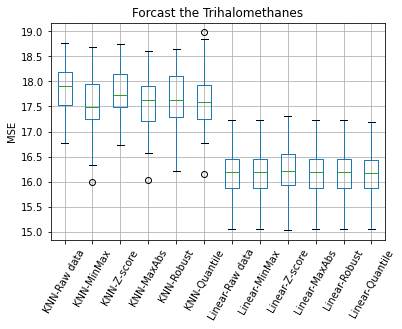

In [21]:
# Forcast Trihalomethanes

#knn model using raw data
X = ndf.drop(['Trihalomethanes'], axis=1).to_numpy() # X is all the other variables
y = ndf['Trihalomethanes'].to_numpy() # y is ph that we want to forecast
scores = cross_val_score(knn_model, X, y,scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
results['KNN-Raw data'] = [abs(elem) for elem in scores]

#knn model using transform data
for i in range (len(arr_scalers)):
    # X is all the other variables
    X = ndf.drop(['Trihalomethanes'], axis=1).to_numpy()
    # Let's tranform X 
    X_t = arr_scalers[i].fit_transform(X)
    # y is ph that we want to forecast
    y = ndf['Trihalomethanes'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    scores = cross_val_score(knn_model, X_t, y, scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
    results[scaler_knn_names[i]] = [abs(elem) for elem in scores]

#linear model using raw data
X = ndf.drop(['Trihalomethanes'], axis=1).to_numpy() # X is all the other variables
y = ndf['Trihalomethanes'].to_numpy() # y is ph that we want to forecast
scores = cross_val_score(linear_model, X, y, scoring='neg_root_mean_squared_error',cv=cv, n_jobs=-1)
results['Linear-Raw data'] = [abs(elem) for elem in scores]

#linear model using transform data
for i in range (len(arr_scalers)):
    # X is all the other variables
    X = ndf.drop(['Trihalomethanes'], axis=1).to_numpy()
    # Let's tranform X 
    X_t = arr_scalers[i].fit_transform(X)
    # y is ph that we want to forecast
    y = ndf['Trihalomethanes'].to_numpy()
    # Let's estimate the values for several rounds of crossvalidation
    scores = cross_val_score(linear_model, X_t, y,scoring='neg_root_mean_squared_error', cv=cv,n_jobs=-1)
    results[scaler_linear_names[i]] = [abs(elem) for elem in scores]

# Now let's create our boxplot
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot(rot=60) 
boxplot.set_ylabel('MSE')
boxplot.set_title('Forcast the Trihalomethanes')
plt.show()

**<font size=3>Forcast Trihalomethanes missing data: The best combination is Linear regression + Quantile scaler cause it decreases the error most significantly</font>**


## Using the best combination to fill the missing data and outliers

In [35]:
# fill ph using Linear regression + Z-score scaler
fix_df_ph = fix_df.copy()
ndf_ph = ndf.copy()
X = ndf_ph.drop(['ph'], axis=1).to_numpy()
y = ndf_ph['ph'].to_numpy()
scaler = Normalizer()
model = LinearRegression()
X_t = scaler.fit_transform(X)
model.fit(X_t, y)
# Now let's predict the missing rows
X_to_pred = fix_df_ph.drop(['ph'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
fix_df_ph['ph'] = y_pred
# put rows back
clean_df = ndf.append(fix_df_ph)


# fill Sulfate using KNN regression + Quantile scaler
fix_df_sul = fix_df.copy()
ndf_sul = ndf.copy()
X = ndf_sul.drop(['Sulfate'], axis=1).to_numpy()
y = ndf_sul['Sulfate'].to_numpy()
scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
model = KNeighborsRegressor()
X_t = scaler.fit_transform(X)
model.fit(X_t, y)
# Now let's predict the missing rows
X_to_pred = fix_df_sul.drop(['Sulfate'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
fix_df_sul['Sulfate'] = y_pred
# put rows back
clean_df = ndf.append(fix_df_sul)


# fill Trihalomethanes using Linear regression + Quantile scaler
fix_df_tr = fix_df.copy()
ndf_tr = ndf.copy()
X = ndf_tr.drop(['Trihalomethanes'], axis=1).to_numpy()
y = ndf_tr['Trihalomethanes'].to_numpy()
scaler = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
model = LinearRegression()
X_t = scaler.fit_transform(X)
model.fit(X_t, y)
# Now let's predict the missing rows
X_to_pred = fix_df_tr.drop(['Trihalomethanes'], axis=1).to_numpy()
y_pred = model.predict(X_to_pred)
# let's add the data to the NaN rows
fix_df_tr['Trihalomethanes'] = y_pred
# put rows back
clean_df = ndf.append(fix_df_tr)


# handle outliers
outlier_names = ['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity',]
def replace_outliers_IQR(df, columns):
    for c in columns:
        q1=df[c].quantile(0.25)
        q3=df[c].quantile(0.75)
        iqr = q3-q1
        low_lim = q1 - 1.5*iqr
        high_lim = q3 + 1.5*iqr
        df[c] = np.where(df[c] >= high_lim, high_lim, np.where(df[c] <= low_lim, low_lim, df[c]))
        
replace_outliers_IQR(clean_df, outlier_names)
clean_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,332.566990,464.525552,11.083027,-7587.429104,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,332.566990,392.449580,19.903225,-8963.499598,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,332.566990,432.044783,11.039070,-16909.601043,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,332.566990,402.883113,11.168946,-6297.925380,4.708658,1


In [23]:
# check missing data again
clean_df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [24]:
# check outlier again
col=df.columns
for i in col:
    outlier=lowerupper(df_c[i].values)
    print(len(outlier),"outliers are present in",i)

0 outliers are present in ph
0 outliers are present in Hardness
0 outliers are present in Solids
0 outliers are present in Chloramines
0 outliers are present in Sulfate
0 outliers are present in Conductivity
0 outliers are present in Organic_carbon
0 outliers are present in Trihalomethanes
0 outliers are present in Turbidity
0 outliers are present in Potability


# Part 4-Feature selection

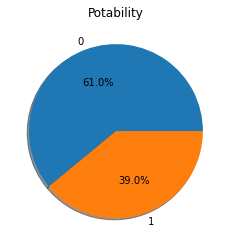

In [25]:
# plot pie for potability
plt.figure()
plt.title("Potability")
la=[0, 1]
plt.pie(df.groupby(df["Potability"]).size(),labels=la, autopct='%1.1f%%',shadow=True)
plt.show()

**Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.**

**Therefore, Potability feature is a suitable target value to forecast.**

We will Select two feature selection techniques below.

**1. Filter approach.**

    Features are selected before a mining algorithm using a heuristics based on general characteristics of the data.

**2. Wrapper approach**
    
    Features are selected as part of the data mining algorithm.

### We choose Random  Forest as baseline model.

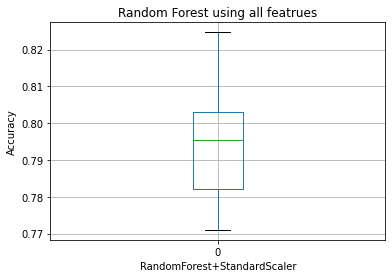

In [26]:
# using cleaning dataset
waterdata = clean_df
X = waterdata.drop(['Potability'], axis = 1)
y = waterdata['Potability']  # target value

#using standardscaler
st= StandardScaler()
X_t = st.fit_transform(X)

# using random forest model
rfc = RandomForestClassifier()

# use a Repeated cross-validation with 5 folds and 10 repetitions 
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=321)

scores = cross_val_score(rfc, X_t, y, scoring='accuracy', cv=cv, n_jobs=-1)
df_res = pd.DataFrame(scores)
p = df_res.boxplot()
p.set_title("Random Forest using all featrues");
p.set_ylabel("Accuracy")
p.set_xlabel("RandomForest+StandardScaler")
plt.show()

### Univariate feature selection  (The first feature selection technique)
Univariate feature selection works by selecting the best features based on univariate statistical tests. It can be seen as a preprocessing step to an estimator. 

Then we will use the SelectKBest method and the scoring functions f_classif and mutual_info_classif to observe performance.

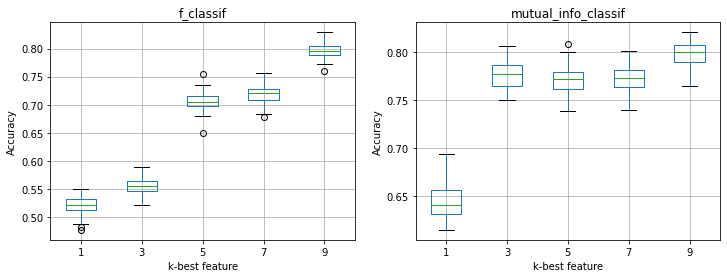

In [27]:
# preparing
X = waterdata.drop(['Potability'], axis = 1)
y = waterdata['Potability']  # target value
sel = SelectKBest()
scaler = StandardScaler()
X_t = scaler.fit_transform(X)
rfc = RandomForestClassifier()
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=321)
k_best = [1, 3, 5, 7, 9]

scores_func = [f_classif, mutual_info_classif]  # this is scores funtion we will use 
scores_names = ['f_classif', 'mutual_info_classif']
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = axs.flatten()
fig_idx = 0
results = {}
for k in range(len(scores_func)):
    for i in k_best:
        sel = SelectKBest(scores_func[k], k=i) 
        X_sel = sel.fit_transform(X_t, y) 
        scores = cross_val_score(rfc, X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)
        results[i] = scores
    df_res = pd.DataFrame(results).copy()
    df_res.boxplot(ax=axs[fig_idx])      #plot the distribution of accuracy of these combinations
    axs[fig_idx].set_title(f"{scores_names[k]}");   
    axs[fig_idx].set_ylabel("Accuracy")
    axs[fig_idx].set_xlabel("k-best feature")
    fig_idx+=1
plt.show()

### Wrapper approaches (The second feature selection technique)

This approach evaluates the performance of a subset of features based on the resulting performance of the applied learning algorithm.  Any learning algorithm can be used in this combination of search strategy and modelling.

In the next example we will see how to use Forward and Backward selection.

**Forward selection** 

This approach starts with an empty set of features and then the dimensions providing the best performance are being iteratively added to the result set.

**Backward selection** 

This approach starts from the set of all features and at each iteration the worst dimension is being removed. 

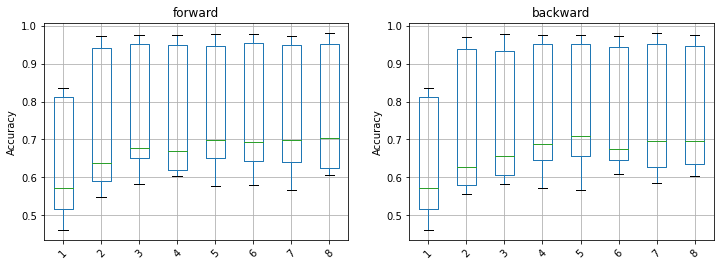

In [30]:
# preparing
X = waterdata.drop(['Potability'], axis = 1)
y = waterdata['Potability']  # target value
scaler = StandardScaler()
X_t = scaler.fit_transform(X)
rfc = RandomForestClassifier()
cv = StratifiedKFold(n_splits=10)
cols = X.columns
direction = ['forward', 'backward']
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs = axs.flatten()
fig_idx = 0
results = {}
for k in range(len(direction)):
    for i in range(len(cols.values)-1):
        sfs = SequentialFeatureSelector(rfc, n_features_to_select = i+1, direction=direction[k])
        X_sel = sfs.fit_transform(X_t, y)
        scores = cross_val_score(rfc, X_sel, y, scoring='accuracy', cv=cv, n_jobs=-1)
        results[f'{i+1}'] = scores
    df_res = pd.DataFrame(results).copy()
    df_res.boxplot(rot=45, ax=axs[fig_idx])
    axs[fig_idx].set_title(f"{direction[k]}");
    axs[fig_idx].set_ylabel("Accuracy")
    fig_idx+=1
plt.show()

The feature selection(both linear and wrapper) does not seem to improve accuracy significantly. First of all, we used clean data instead of raw data, so we handled the outliers and missing data before feature selection. Besides, the nine other attributes are all crucial measurements regarding the quality of the water. Finally, the baseline already has a decent accuracy(79%). So it’s logical that feature selection doesn’t improve the accuracy.